## ENCM 515 Project Part 2

This jupyter notebook was provided as part of the project materials and extended
to include Python implementation of image convolution using a 3x3 filter kernel.

## Import Dependencies

In [14]:
from PIL import Image
import numpy as np

## Image Formatting

The image is stored in combined.bin file as a 1D array. The array is organized
as follows:

![Image Formatting](image_formatting.png)

Each pixel is 24 bits , 8-bits per channel (R,G,B) that can be interpreted 
as an unsigned integer from 0-255 or Q0.8 format from 0-0.99709375.

## Synthetic Image Sample

Example 1: See this code to generate the synthetic 4px by 4px example as in the brief

In [21]:
# create a small example image for the project brief
width_cols = 4
height_rows = 4
image_data = [0] * width_cols*height_rows*3 # initialize an image with all 0s
for row in range(0,height_rows):
  for col in range(0,width_cols):
    if (col == 0 and row == 0):
      # red:
      image_data[row*height_rows*3 + 3*col + 0] = 255
      # green:
      image_data[row*height_rows*3 + 3*col + 1] = 0
      # blue:
      image_data[row*height_rows*3 + 3*col + 2] = 0
    if (col == 1 and row == 0):
      # red:
      image_data[row*height_rows*3 + 3*col + 0] = 0
      # green:
      image_data[row*height_rows*3 + 3*col + 1] = 255
      # blue:
      image_data[row*height_rows*3 + 3*col + 2] = 0
    if (col == 2 and row == 0):
      # red:
      image_data[row*height_rows*3 + 3*col + 0] = 0
      # green:
      image_data[row*height_rows*3 + 3*col + 1] = 0
      # blue:
      image_data[row*height_rows*3 + 3*col + 2] = 255
    if (col == 3 and row == 0):
      # red:
      image_data[row*height_rows*3 + 3*col + 0] = 128
      # green:
      image_data[row*height_rows*3 + 3*col + 1] = 128
      # blue:
      image_data[row*height_rows*3 + 3*col + 2] = 128
    if (row == 1):
      # red:
      image_data[row*height_rows*3 + 3*col + 0] = 0
      # green:
      image_data[row*height_rows*3 + 3*col + 1] = 0
      # blue:
      image_data[row*height_rows*3 + 3*col + 2] = 128
    if (row == 2):
      # red:
      image_data[row*height_rows*3 + 3*col + 0] = 0
      # green:
      image_data[row*height_rows*3 + 3*col + 1] = 128
      # blue:
      image_data[row*height_rows*3 + 3*col + 2] = 0
    if (row == 3):
      # red:
      image_data[row*height_rows*3 + 3*col + 0] = 128
      # green:
      image_data[row*height_rows*3 + 3*col + 1] = 0
      # blue:
      image_data[row*height_rows*3 + 3*col + 2] = 0


In [22]:
# this will print the "raw data" as an integer array
print(image_data[0:])

[255, 0, 0, 0, 255, 0, 0, 0, 255, 128, 128, 128, 0, 0, 128, 0, 0, 128, 0, 0, 128, 0, 0, 128, 0, 128, 0, 0, 128, 0, 0, 128, 0, 0, 128, 0, 128, 0, 0, 128, 0, 0, 128, 0, 0, 128, 0, 0]


In [23]:
# to render this as an image, we can convert the integer array into a byte array
# the byte array can later be written to a binary file for use in the STM32F411E Disco
bytear = bytes(image_data)
print(bytear)

b'\xff\x00\x00\x00\xff\x00\x00\x00\xff\x80\x80\x80\x00\x00\x80\x00\x00\x80\x00\x00\x80\x00\x00\x80\x00\x80\x00\x00\x80\x00\x00\x80\x00\x00\x80\x00\x80\x00\x00\x80\x00\x00\x80\x00\x00\x80\x00\x00'


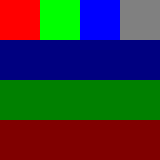

In [24]:
# display what we've created as an image
new_image = Image.frombytes("RGB",(4,4),bytear)
display(new_image.resize((40*new_image.width, 40*new_image.height), Image.NEAREST))

In [25]:
# and write this image as a binary file
with open("example.bin","wb") as file:
  file.write(bytear)

Example 2: See this code to read from combined.bin file to generate the image.

In [2]:
def read_image_from_binary(filename):
  '''   This function takes a single binary file with possibly multiple 64*64*3 bytes and displays a single 64x64 RGB image  '''
  with open(filename,"rb") as binaryfile:
    bytedata = binaryfile.read()
    return bytedata

In [27]:
byte_string_of_images = read_image_from_binary("combined.bin")
print(byte_string_of_images) # this is the byte string representing the images

b'q\xaf\xeap\xae\xe9o\xad\xe8p\xae\xe9o\xad\xe8o\xad\xean\xab\xeam\xaa\xebm\xaa\xebl\xa8\xeek\xa7\xedg\xa6\xe9e\xa4\xe7c\xa2\xe5b\xa1\xe4a\xa0\xe3_\x9e\xe3_\x9e\xe3_\x9e\xe3_\x9e\xe3]\x9c\xe1]\x99\xdf\\\x98\xde[\x97\xdd]\x99\xdf\\\x98\xde[\x97\xddZ\x97\xdaZ\x95\xd7X\x93\xd5T\x93\xd6R\x92\xd9]\x8c\xd4T\x8e\xd8M\x8f\xddO\x8c\xdcV\x87\xd6R\x86\xdaN\x87\xd6K\x87\xcfD\x87\xcd>\x86\xd0<\x83\xd1>}\xcc:y\xc8:y\xc89x\xc78w\xc67v\xc66u\xc55t\xc43r\xc22q\xc10o\xbf/n\xbe.m\xbd-l\xbc,k\xbb+j\xba*g\xba)f\xb9\'d\xb7&c\xb6%b\xb5t\xb2\xeds\xb1\xecr\xb0\xebs\xb1\xecq\xaf\xeap\xae\xebo\xac\xebn\xab\xecl\xa9\xeak\xa8\xebj\xa7\xeag\xa6\xe9e\xa4\xe7d\xa3\xe6c\xa2\xe5b\xa1\xe4a\xa0\xe5a\xa0\xe5a\xa0\xe5`\x9f\xe4^\x9d\xe2_\x9b\xe1^\x9a\xe0]\x99\xdf]\x99\xdf\\\x98\xde[\x98\xdbZ\x97\xd8Y\x96\xd7V\x95\xd8T\x94\xdbQ\x94\xdbV\x91\xd5R\x91\xd4P\x91\xd3P\x8f\xd6P\x8c\xd5M\x88\xceK\x86\xc8I\x84\xc6F\x82\xcaB\x7f\xd0?}\xd0@\x7f\xce>}\xcc<{\xca;z\xc9:y\xc88w\xc77v\xc66u\xc54s\xc33r\xc22q\xc11p\xc00o\xbf.m\xbd-l\xbc-l\x

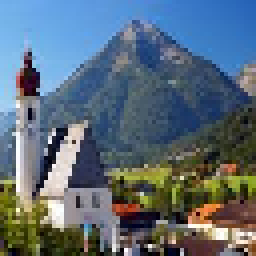

In [28]:
# use PIL to display the first image in the set
# hint: take a look at how we address the string of images
new_image = Image.frombytes("RGB",(64,64),byte_string_of_images[0:64*64*3])
display(new_image.resize((4*new_image.width, 4*new_image.height), Image.NEAREST))

In [29]:
images_as_array_of_ints = list(byte_string_of_images)
print(images_as_array_of_ints[0:100]) # this is the byte string as an array of ints, showing the first 100

[113, 175, 234, 112, 174, 233, 111, 173, 232, 112, 174, 233, 111, 173, 232, 111, 173, 234, 110, 171, 234, 109, 170, 235, 109, 170, 235, 108, 168, 238, 107, 167, 237, 103, 166, 233, 101, 164, 231, 99, 162, 229, 98, 161, 228, 97, 160, 227, 95, 158, 227, 95, 158, 227, 95, 158, 227, 95, 158, 227, 93, 156, 225, 93, 153, 223, 92, 152, 222, 91, 151, 221, 93, 153, 223, 92, 152, 222, 91, 151, 221, 90, 151, 218, 90, 149, 215, 88, 147, 213, 84, 147, 214, 82, 146, 217, 93, 140, 212, 84]


In [30]:
print(len(images_as_array_of_ints)) # let's see how long the whole thing is
# note: each image has 64*64*3 bytes = 12288 bytes. How many images are there in combined.bin?

61440


## Multiple Images Stored

There seems to be 5 images in combined.bin. Let us take a look what those are.
61440/(64x64x3) = 5

### Second Image

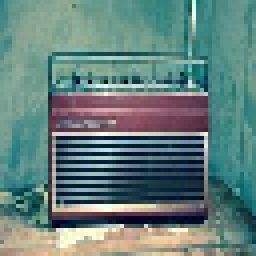

In [35]:
# use PIL to display the first image in the set
# hint: take a look at how we address the string of images
start = 64*64*3
end = start + (64*64*3)
new_image_2 = Image.frombytes("RGB",(64,64),byte_string_of_images[start:end])
display(new_image_2.resize((4*new_image_2.width, 4*new_image_2.height), Image.NEAREST))

### Third Image

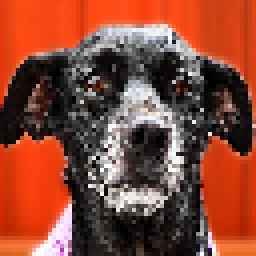

In [36]:
# use PIL to display the first image in the set
# hint: take a look at how we address the string of images
start = (64*64*3)*2
end = start + (64*64*3)
new_image_2 = Image.frombytes("RGB",(64,64),byte_string_of_images[start:end])
display(new_image_2.resize((4*new_image_2.width, 4*new_image_2.height), Image.NEAREST))

### Fourth Image

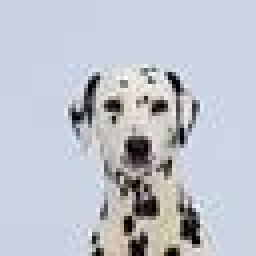

In [31]:
# use PIL to display the first image in the set
# hint: take a look at how we address the string of images
start = (64*64*3)*3
end = start + (64*64*3)
new_image_2 = Image.frombytes("RGB",(64,64),byte_string_of_images[start:end])
display(new_image_2.resize((4*new_image_2.width, 4*new_image_2.height), Image.NEAREST))

### Fifth Image

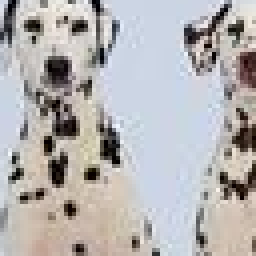

In [38]:
# use PIL to display the first image in the set
# hint: take a look at how we address the string of images
start = (64*64*3)*4
end = start + (64*64*3)
new_image_2 = Image.frombytes("RGB",(64,64),byte_string_of_images[start:end])
display(new_image_2.resize((4*new_image_2.width, 4*new_image_2.height), Image.NEAREST))

singleImage.shape=(256, 256, 3)


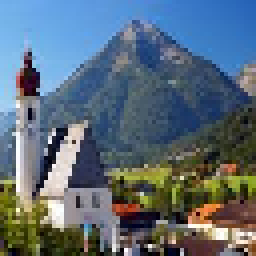

In [39]:
# more hints:
image_idx = 0
singleImage = Image.frombytes("RGB",(64,64),byte_string_of_images[image_idx*64*64*3:(1+image_idx)*64*64*3])
singleImage = singleImage.resize((4*singleImage.width, 4*singleImage.height), Image.NEAREST)
singleImage = np.array(singleImage)
print(f"{singleImage.shape=}")
display(Image.fromarray(singleImage))

## Image Convolution
The following cells shows the implementation of the image convolution in Python.

In [4]:
def convolution_filter(gray_img: np.ndarray, kernel: list, padding: str=None) -> np.ndarray:
    """
    This function performs image convolution

    Parameters
    ----------
        gray_img: np.ndarray
            The image to convolve. It is titled as gray_img because it expects
            a 2D single channel array. For 3 channel images, each channel can
            be passed into this function for per channel convolution. 

        kernel: list
            This is the 3x3 filter kernel.

        padding: str
            This is the type of edge handling to perform. 
            If none is passed, then do not handle edges, meaning an image
            that is 64x64 will retain the effects of downsizing to 62x62 when
            using 3x3 kernel.

            If "extend" is passed, this means the edge values of the image
            will be extended as necessary to provide values for convolution
            allowing the filter to start at the top left corner of the actual
            image passed.

            If "constant" is passed, this means the edge values of the image
            will be padded with zeros as necessary to allow the filter to
            start at the top left corner of the actual image. 

    Returns
    -------
        result: np.ndarray
            The convolved image.
    """
    kernel_size = len(kernel)

    if padding is not None:
        height, width = gray_img.shape
        # Padding needed to retain the original dimensions.
        pad_count = kernel_size - 1
        # Actual image content starts after the padding. 
        pad_start = int(pad_count/2)
        
        if padding.lower() == "extend":
            temp_img = np.pad(gray_img, pad_start, 'edge')
        elif padding.lower() == "constant":
            temp_img = np.zeros(shape=(height+pad_count, width+pad_count))
            # Numpy array last indexing is not inclusive. Keep padding as the border of the actual image.
            temp_img[pad_start:height+pad_start, pad_start:width+pad_start] = gray_img[:, :]
        else:
            raise ValueError(f"Unknown padding passed: {padding}")
    else:
        temp_img = gray_img

    row = temp_img.shape[0] - kernel_size + 1
    col = temp_img.shape[1] - kernel_size + 1
    result = np.zeros(shape=(row, col))

    for i in range(row):
        for j in range(col):
            current = temp_img[i:i+kernel_size, j:j+kernel_size]
            multiplication = sum(sum(current * kernel))
            # Saturation
            if multiplication > 255:
                multiplication = 255
            elif multiplication < 0:
                multiplication = 0
            result[i, j] = multiplication
    return result

#### Perform Python's implementation of convolution with "extend" type padding on the set of images stored in combined.bin
Note the images have been resized to 256x256x3 for better visibility, but the actual image processed is 64x64x3

Before Convolution
original_image.shape=(64, 64, 3)


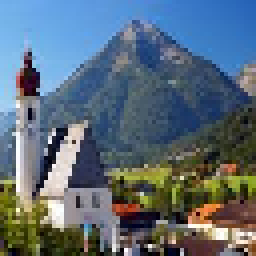


After Convolution
filtered_image.shape=(64, 64, 3)


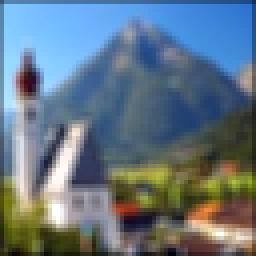

Before Convolution
original_image.shape=(64, 64, 3)


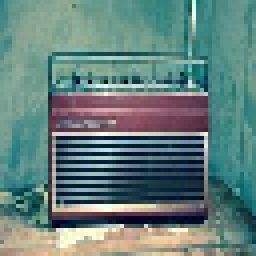


After Convolution
filtered_image.shape=(64, 64, 3)


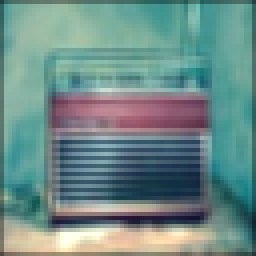

Before Convolution
original_image.shape=(64, 64, 3)


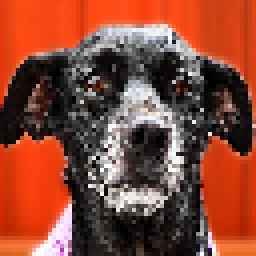


After Convolution
filtered_image.shape=(64, 64, 3)


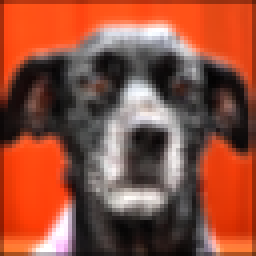

Before Convolution
original_image.shape=(64, 64, 3)


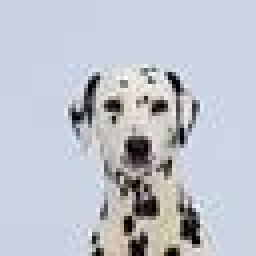


After Convolution
filtered_image.shape=(64, 64, 3)


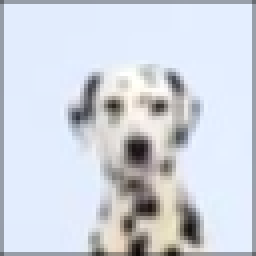

Before Convolution
original_image.shape=(64, 64, 3)


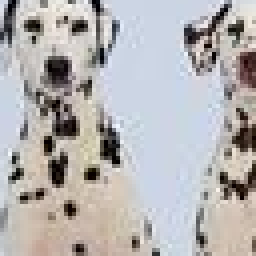


After Convolution
filtered_image.shape=(64, 64, 3)


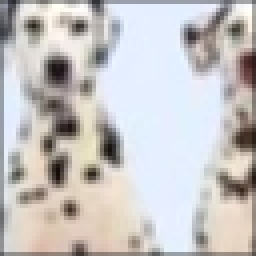

In [13]:
## Define Parameters ##

# 1. Edge Filter
k = [[ 0.125, 0.125, 0.125], 
     [ 0.125, 0.125, 0.125], 
     [ 0.125, 0.125, 0.125]]
kernel_size = len(k)

# 2. Padding 
padding = "constant" # Options are None, "extend", "constant".
channels = 3

# 3. Define Image
byte_string_of_images = read_image_from_binary("combined.bin")
for image_idx in range(5):
    singleImage = Image.frombytes("RGB",(64,64),byte_string_of_images[image_idx*64*64*3:(1+image_idx)*64*64*3])
    height, width = singleImage.height, singleImage.width
    singleImage = np.array(singleImage)
    original_image = singleImage.copy()
    print("Before Convolution")
    print(f"{original_image.shape=}")
    display(Image.fromarray(original_image).resize((4*width, 4*height), Image.NEAREST))

    # Resulting Image
    if padding:
        row = original_image.shape[0]
        col = original_image.shape[1]
    else:
        row = original_image.shape[0] - kernel_size + 1
        col = original_image.shape[1] - kernel_size + 1
    filtered_image = np.zeros((row, col, channels))

    for c in range(channels):
        filtered_image[:,:,c] = convolution_filter(original_image[:,:,c], k, padding) 

    print("\nAfter Convolution")
    print(f"{filtered_image.shape=}")
    display(Image.fromarray(filtered_image.astype('uint8'), 'RGB').resize((4*width, 4*height), Image.NEAREST))

## STM32 Implementation
The following cells shows the visualization of the image convolution implementation
in STM32. The following image outputs are stored:
* Identity Kernel: "STM32IdentityOutput.bin"
* Blur Kernel: "STM32BlurOutput.bin"
* Edge Kernel: "STM32EdgeOutput.bin"

The current implementation does not support handling of edge cases, so an image
passed as 64x64 will reduce in resolution to 62x62 when using 3x3 filter kernel.


After Convolution
filtered_image.shape=(64, 64, 3)


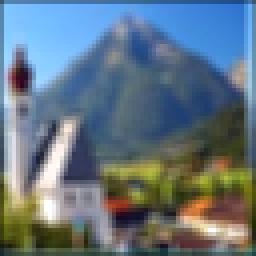


After Convolution
filtered_image.shape=(64, 64, 3)


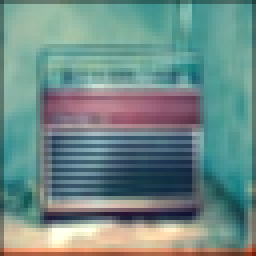


After Convolution
filtered_image.shape=(64, 64, 3)


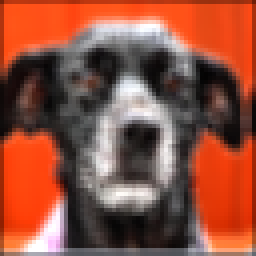


After Convolution
filtered_image.shape=(64, 64, 3)


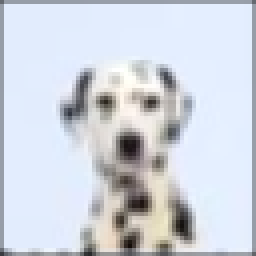


After Convolution
filtered_image.shape=(64, 64, 3)


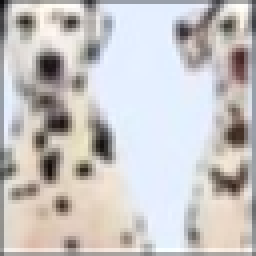

In [19]:
byte_string_of_images = read_image_from_binary("STM32BlurOutput.bin")
# use PIL to display the first image in the set
# hint: take a look at how we address the string of images
for image_idx in range(5):
    new_image = Image.frombytes("RGB",(64,64),byte_string_of_images[image_idx*64*64*3:(1+image_idx)*64*64*3])
    print("\nAfter Convolution")
    print(f"filtered_image.shape=(64, 64, 3)")
    display(new_image.resize((4*new_image.width, 4*new_image.height), Image.NEAREST))

## Testing
The following cells shows testing of the convolution implementation in both
Python and C to see if the outputs have expected results.

In [7]:
# Original Image
byte_string_of_images = read_image_from_binary("combined.bin")
original_images = list()
for image_idx in range(5):
    singleImage = Image.frombytes("RGB",(64,64),byte_string_of_images[image_idx*64*64*3:(1+image_idx)*64*64*3])
    singleImage = np.array(singleImage)
    original_images.append(singleImage)

### Python Convolution Implementation
Confirm python's identity convolution matches the original image. 
Also confirm python's edge filter convolution without padding matches STM32's implementation.

In [6]:
## Define Parameters ##

# 1. Identity Filter
k = [[0, 0, 0], 
     [0, 1, 0], 
     [0, 0, 0]]
# 1. Edge Filter
k_edge = [[ 0, -1,  0], 
          [-1,  4, -1], 
          [ 0, -1,  0]]
kernel_size = len(k)

# 2. Padding 
padding = "extend" # Options are None, "extend", "constant".
channels = 3

identity_images = list()
edge_images = list()

# 3. Define Image
byte_string_of_images = read_image_from_binary("combined.bin")
for image_idx in range(5):
    singleImage = Image.frombytes("RGB",(64,64),byte_string_of_images[image_idx*64*64*3:(1+image_idx)*64*64*3])
    height, width = singleImage.height, singleImage.width
    singleImage = np.array(singleImage)
    original_image = singleImage.copy()

    # Resulting Image
    
    row_id = original_image.shape[0]
    col_id = original_image.shape[1]
    
    row_ed = original_image.shape[0] - kernel_size + 1
    col_ed = original_image.shape[1] - kernel_size + 1

    # Perform identity convolution
    identity_image = np.zeros((row_id, col_id, channels))
    for c in range(channels):
        identity_image[:,:,c] = convolution_filter(original_image[:,:,c], k, "extend") 
    identity_images.append(identity_image)

    # Perform Edge Convolution
    original_image = singleImage.copy()
    edge_image = np.zeros((row_ed, col_ed, channels))
    for c in range(channels):
        edge_image[:,:,c] = convolution_filter(original_image[:,:,c], k_edge, None)
    edge_images.append(edge_image)

### STM32 Convolution Implementation

In [20]:
stm_edge_images = list()
byte_string_of_images = read_image_from_binary("STM32EdgeOutput.bin")
# use PIL to display the first image in the set
# hint: take a look at how we address the string of images
for image_idx in range(5):
    stm_edge_image = Image.frombytes("RGB",(62,62),byte_string_of_images[image_idx*62*62*3:(1+image_idx)*62*62*3])
    stm_edge_image = np.array(stm_edge_image)
    stm_edge_images.append(stm_edge_image)

## Import PyTest Dependencies

In [8]:
# Uncomment cell below if ipytest is not installed.
#!pip install ipytest
import ipytest
ipytest.autoconfig()

In [9]:
%%ipytest

def test_python_identity_convolution():
    for image_idx in range(5):
        assert identity_images[image_idx].shape == original_images[image_idx].shape
        assert np.array_equal(identity_images[image_idx], original_images[image_idx])

.                                                                                            [100%]
1 passed in 0.02s


In [ ]:
%%ipytest

def test_edge_convolution():
    for image_idx in range(5):
        assert stm_edge_images[image_idx].shape == edge_images[image_idx].shape
        assert np.array_equal(stm_edge_images[image_idx], edge_images[image_idx])